In [10]:
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
from torch.autograd import Function
from utils import*
from detection_output import Detect
from prior_box import PriorBox
from l2norm import L2norm as L2norm
import torchvision.transforms as transforms
import torchvision.models as models
from torch.utils.serialization import load_lua
import PIL
from PIL import Image
from f_l2norm import L2norm as norm
from model import build_ssd
import torch.backends.cudnn as cudnn


In [11]:
net = build_ssd()

In [12]:
img = load_lua('data/img9505.t7')
img = img.float()

In [13]:
ssd = load_lua('weights/VOC.t7')

In [14]:
norm_weights = load_lua('weights/normWeights.t7')

In [15]:
pytorch_modules = list(net.modules())

In [16]:
next_pytorch_idx = 0
for i, t7_module in enumerate(ssd.modules):
    if not hasattr(t7_module, 'weight'):
        continue
    assert hasattr(t7_module, 'bias')
    while not hasattr(pytorch_modules[next_pytorch_idx], 'weight'):
        next_pytorch_idx += 1
    pytorch_module = pytorch_modules[next_pytorch_idx]
    next_pytorch_idx += 1
    if(pytorch_module.weight.data.dim() == 1):
        pytorch_module = pytorch_modules[next_pytorch_idx]
        next_pytorch_idx += 1
    print(t7_module.weight.size())
    print(pytorch_module.weight.data.size())
    assert(t7_module.weight.size() == pytorch_module.weight.size())
    print('%r Copying data from\n  %r to\n  %r' % (i, t7_module, pytorch_module))

    pytorch_module.weight.data.copy_(t7_module.weight)
    assert(t7_module.bias.size() == pytorch_module.bias.size())
    pytorch_module.bias.data.copy_(t7_module.bias)


torch.Size([64, 3, 3, 3])
torch.Size([64, 3, 3, 3])
0 Copying data from
  nn.SpatialConvolution(3 -> 64, 3x3, 1, 1, 1, 1) to
  Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([64, 64, 3, 3])
torch.Size([64, 64, 3, 3])
2 Copying data from
  nn.SpatialConvolution(64 -> 64, 3x3, 1, 1, 1, 1) to
  Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([128, 64, 3, 3])
torch.Size([128, 64, 3, 3])
5 Copying data from
  nn.SpatialConvolution(64 -> 128, 3x3, 1, 1, 1, 1) to
  Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([128, 128, 3, 3])
torch.Size([128, 128, 3, 3])
7 Copying data from
  nn.SpatialConvolution(128 -> 128, 3x3, 1, 1, 1, 1) to
  Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
torch.Size([256, 128, 3, 3])
torch.Size([256, 128, 3, 3])
10 Copying data from
  nn.SpatialConvolution(128 -> 256, 3x3, 1, 1, 1, 1) to
  Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
tor

In [17]:
# Copy L2norm layer weights
pytorch_modules[-14].weight.data.copy_(norm_weights);

In [18]:

input = img
input = Variable(input)


output = net(input,'test')

7.894736842105263
7.894736842105263
15.789473684210526
15.789473684210526
30.0
30.0
60.0
60.0
100.0
100.0
300.0
300.0
1
torch.Size([1, 21, 7308])
torch.Size([7308, 4])
yo

 1714
 1904
 1711
 1717
 3145
 1790
 3030
 3144
 1903
 1900
 1603
 1827
 1998
 1712
 1600
 1596
 1719
 2001
 5246
 1720
 1597
 2246
 1721
 3141
 3151
 3079
 2131
 1907
 2018
 2919
 1887
 2016
 2014
 2964
 5356
 3075
 1606
 2962
 1723
    1
 3194
 4219
 2132
 3189
 1997
 5470
 3193
 1777
 1901
 3076
 2967
 4331
 1485
 3308
  940
 4218
 1482
 1309
 1776
  937
 1605
    2
 2968
 1789
 2850
 1826
 1999
 3190
 1194
 3080
 1195
 1382
 2792
 6388
 2910
 3082
 5354
 1252
    0
 2060
 1906
 5244
 1773
 1480
 7043
  682
 1897
 3418
 6418
 2918
  325
 5468
 3328
 5312
 3081
 2620
 1488
 3589
 1495
 2052
 3304
 1491
 3585
 1366
 2395
 6496
 2003
 5240
 2021
 4442
  910
 2849
 3913
 2000
 3138
 7049
 1499
 1780
 2249
 2008
 3147
 2461
 1269
 1308
 2343
 3154
 5360
 3417
 1938
 7242
 2852
  834
 2112
 1543
 6076
 1267
 2913
 1894


In [19]:
output.size()

torch.Size([1, 200, 7])

In [21]:
for i in range(output.data.size(1)):
    print(output.data[0][i])


  1.0000
 15.0000
  0.9984
  0.0334
  0.1565
  0.5666
  0.8435
[torch.FloatTensor of size 7]


  1.0000
 15.0000
  0.9974
  0.0337
  0.1679
  0.5663
  0.8321
[torch.FloatTensor of size 7]


  1.0000
 15.0000
  0.9954
  0.0821
  0.1185
  0.6179
  0.7815
[torch.FloatTensor of size 7]


  1.0000
 15.0000
  0.9624
  0.0000
  0.1621
  0.5858
  0.8379
[torch.FloatTensor of size 7]


  1.0000
 15.0000
  0.9243
  0.0482
  0.1625
  0.6418
  0.8375
[torch.FloatTensor of size 7]


  1.0000
 15.0000
  0.9104
  0.0809
  0.2962
  0.6191
  1.0000
[torch.FloatTensor of size 7]


  1.0000
 15.0000
  0.8850
  0.0000
  0.1527
  0.5592
  0.8473
[torch.FloatTensor of size 7]


  1.0000
 15.0000
  0.8272
  0.2122
  0.1406
  0.7878
  0.8594
[torch.FloatTensor of size 7]


  1.0000
 15.0000
  0.8010
  0.1981
  0.1171
  0.7019
  0.7829
[torch.FloatTensor of size 7]


  1.0000
 15.0000
  0.7518
  0.0295
  0.1456
  0.5705
  0.8544
[torch.FloatTensor of size 7]


  1.0000
 15.0000
  0.7219
  0.0290
  0.2741
  0.

In [22]:
detections = output.data.numpy()

In [23]:
# Parse the outputs.
det_label = detections[0,:,1]
det_conf = detections[0,:,2]
det_xmin = detections[0,:,3]
det_ymin = detections[0,:,4]
det_xmax = detections[0,:,5]
det_ymax = detections[0,:,6]

# Get detections with confidence higher than 0.6.
top_indices = [i for i, conf in enumerate(det_conf) if conf >= 0.6]

top_conf = det_conf[top_indices]
top_label_indices = det_label[top_indices].tolist()
#top_labels = get_labelname(labelmap, top_label_indices)
top_xmin = det_xmin[top_indices]
top_ymin = det_ymin[top_indices]
top_xmax = det_xmax[top_indices]
top_ymax = det_ymax[top_indices]

In [24]:
top_indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [25]:
imsize = 300
loader = transforms.Compose([
             transforms.Scale(imsize),# scale imported image
             transforms.CenterCrop(imsize)])
           # transforms.ToTensor()]) # transform it into a torch tensor

def image_loader(image_name):
    image = Image.open(image_name)
    image = loader(image)
    #image = image.unsqueeze(0) # fake batch dimension required to fit network's input dimensions
    return image


image = image_loader("data/IMG_9505.jpg")


In [26]:
image.show()

In [27]:
import matplotlib.pyplot as plt
colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()

plt.imshow(image)
currentAxis = plt.gca()

for i in range(top_conf.shape[0]):
    xmin = int(round(top_xmin[i] * image.size[1]))
    ymin = int(round(top_ymin[i] * image.size[0]))
    xmax = int(round(top_xmax[i] * image.size[1]))
    ymax = int(round(top_ymax[i] * image.size[0]))
    score = top_conf[i]
    label = int(top_label_indices[i])
    #label_name = top_labels[i]
    display_txt = '%.2f'%(score)
    coords = (xmin, ymin), xmax-xmin+1, ymax-ymin+1
    color = colors[label]
    currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
    currentAxis.text(xmin, ymin, display_txt, bbox={'facecolor':color, 'alpha':0.5})

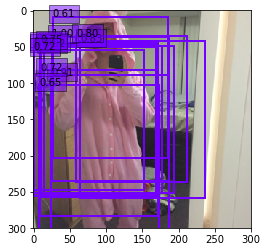

In [28]:
plt.show()

In [ ]:
import os
cwd = os.getcwd()

In [ ]:
ssd.modules

In [ ]:
pytorch_modules[-14].

In [ ]:
8340-7308

In [ ]:
cwd